   
   # Predicting Solar Energy Potential with Machine Learning

>## Contents ##
>###### 1. Imports  
>###### 2. Pre-Processing  
>###### 3. Data Split
>###### 4. Exploratory Analysis
>###### 5. Feature Selection
        - Recursive Feature Elimination   
>###### 6. Models / / RandomCV / / Testing
       - DummyRegressor  
       - RandromForestRegressor  
       - SGDRegressor  
       - MLPRegressor  
>###### 7. Summary of Scores

>>## Imports ##

In [2]:
                                                                          # STANDARDS
import numpy as np
import pandas as pd
import pprint
                                                                          # PRE-PROCESSING
from sklearn.preprocessing import StandardScaler
                                                                          # FEATURE SELECTION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

                                                                          # PIPELINE
from sklearn.pipeline import Pipeline
                                                                          # REGRESSORS
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

                                                                          # NEURAL NETWORK
from sklearn.neural_network import MLPRegressor

                                                                          # CROSS VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

                                                                          # EVALUATION
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score
# from sklearn.metrics import SCORERS

                                                                          # PLOTTING
#from plotting import plot_learning_curve, plot_validation_curve
#from plotting import plot_validation_curve
#from mlxtend.plotting import plot_learning_curves
import random
import matplotlib.pyplot as plt
import seaborn as sns

                                                                          # DATA SET
df = pd.read_csv("https://raw.githubusercontent.com/SamuelMiller413/Predicting-Solar-Energy/main/Pasion%20et%20al%20dataset.csv")

>>## Initial EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

### Summary Statistics

In [4]:
df.describe()

Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   
std    4.579846e+07      2.983958      1.672952     23.823011     12.366820   
min    2.017050e+11      1.000000     10.000000      0.000000    -19.981770   
25%    2.017110e+11      4.000000     11.000000     17.529300     21.915280   
50%    2.018030e+11      7.000000     13.000000     33.123780     30.289150   
75%    2.018060e+11      9.000000     14.000000     52.593990     37.474670   
max    2.018100e+11     12.000000     15.000000     99.987790     65.738370   

            PolyPwr    Wind.Speed    Visibility      Pressure  Cloud.Ceiling  
count  21045.000000  21045.000000  21045.000000  21045.000000   21045.000000  
mean      12.978583     10.318318      9.700071    925.944747     515.966785  
std        7.123255      6.385030      1.351949     85.215659     301.903379  
min        0.257330      0.000000      0.000000    781.700000       0.000000  
25%        6.404570      6.000000     10.000000    845.500000     140.000000  
50%       13.798700      9.000000     10.000000    961.100000     722.000000  
75%       18.863650     14.000000     10.000000   1008.900000     722.000000  
max       34.285020     49.000000     10.000000   1029.500000     722.000000

In [5]:
print(f"""                           < Summary Statistics: >

{df.describe()}


Target Variable:
{df["PolyPwr"].describe()}


Shape of DataFrame:    {df.shape}""")

                           < Summary Statistics: >

               Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   

#### Heat Map

ValueError: could not convert string to float: 'Camp Murray'

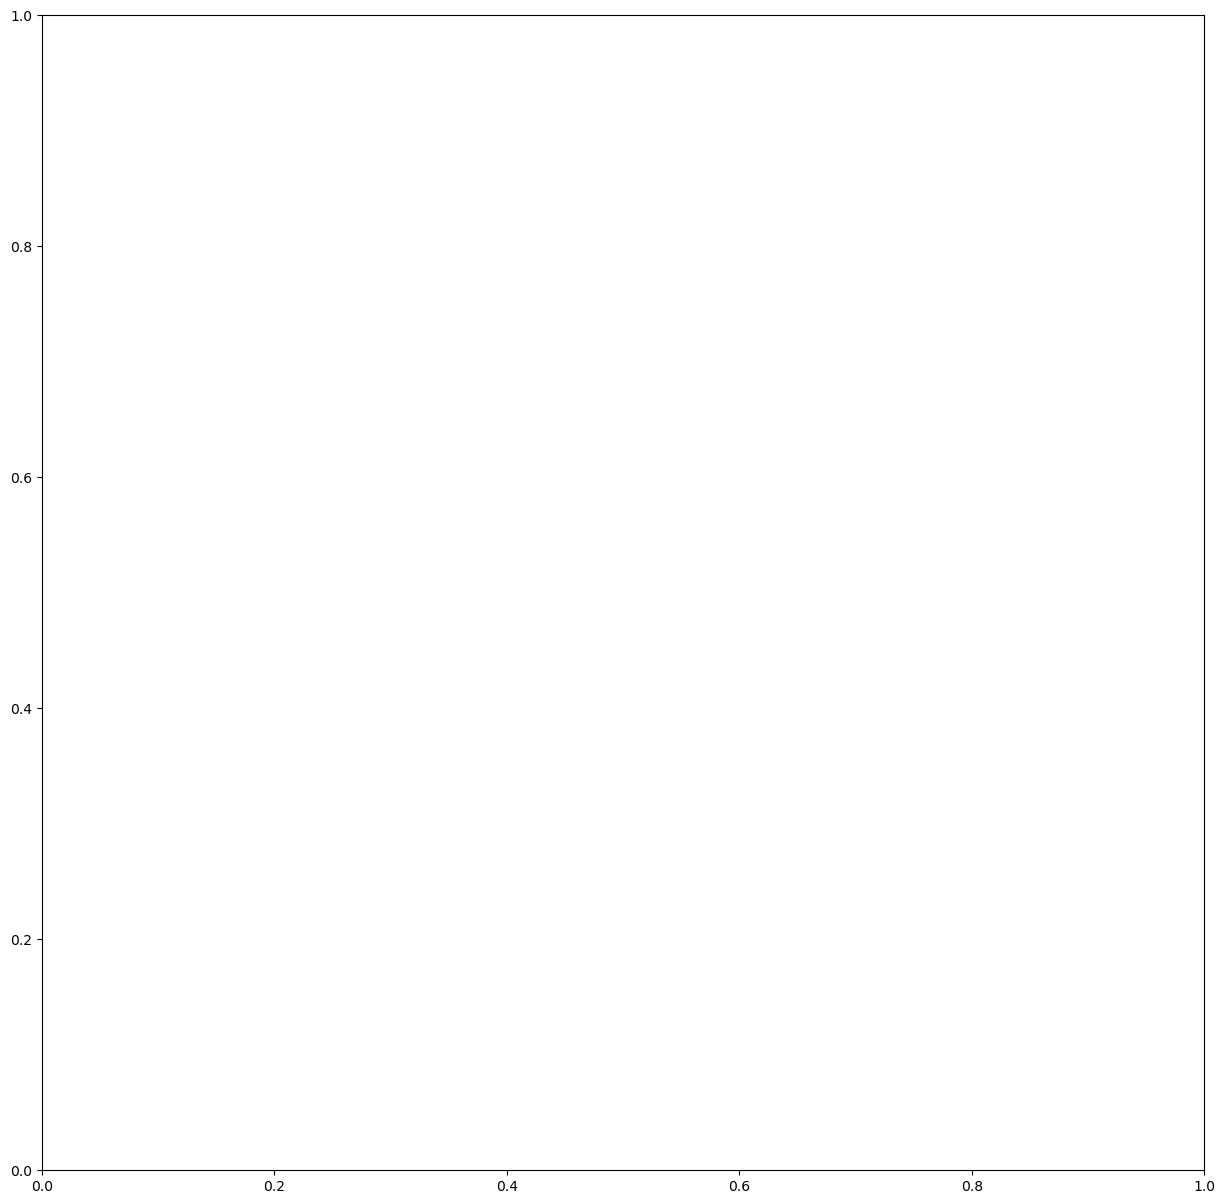

In [6]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True)
plt.show();

>>## Pre-Processing ##

### Train / Test Split ###

In [7]:
# X, y
y = df.loc[:,'PolyPwr']
X = df.drop(labels = 'PolyPwr', axis=1)

# train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##### Dropped Column DF #####

In [8]:
y_drop = df.loc[:,'PolyPwr']
X = df.drop(labels = 'PolyPwr', axis=1)


In [9]:
print(f"test: {X_test.shape}")
print(f"train: {X_train.shape}")


test: (4209, 16)
train: (16836, 16)


### One Hot Encoding  / Drop ###


#### Train #####

In [10]:
# OHE -
# Season
dum_season = pd.get_dummies(X_train.loc[:,'Season'], dtype='int64')       # APPLY METHOD TO COLUMN -> SAVE AS DUM
X_train = pd.concat((X_train,dum_season), axis = 1)                       # ADD new COLUMNS
X_train.drop('Season', axis=1,inplace=True)                               # DROP old COLUMN


# DROP -
# Location
X_train.drop('Location', axis=1,inplace=True)
# Longitude
X_train.drop('Longitude', axis=1,inplace=True)
# Altitude
X_train.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
X_train.drop('YRMODAHRMI', axis=1,inplace=True)

#### Test #####

In [11]:
# OHE -
# Season
dum_season = pd.get_dummies(X_test.loc[:,'Season'], dtype='int64')
X_test = pd.concat((X_test,dum_season), axis = 1)
X_test.drop('Season', axis=1,inplace=True)

# DROP -
# Location
X_test.drop('Location', axis=1,inplace=True)
# Longitude
X_test.drop('Longitude', axis=1,inplace=True)
# Altitude
X_test.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
X_test.drop('YRMODAHRMI', axis=1,inplace=True)

##### Column Index ######

In [12]:
columns= {}
for i in range(len(X_train.columns)):
     columns[i] = X_train.columns[i]
columns = pd.DataFrame.from_dict(columns,orient='index')
columns

0
0            Date
1            Time
2        Latitude
3           Month
4            Hour
5        Humidity
6     AmbientTemp
7      Wind.Speed
8      Visibility
9        Pressure
10  Cloud.Ceiling
11           Fall
12         Spring
13         Summer
14         Winter

### Scaler ###

In [15]:
scaler = StandardScaler()

### Code Functions

#### Cross Validator ###

In [16]:
cv = KFold(n_splits = 3, shuffle=True)

#### Pipelines ####

In [17]:
pipes = {}
def add_pipe(pipe, name):
    if name in pipes.keys():
        print(f"A pipe called '{name}' already exists!")
        new_name = input("Enter another name:]")
        pipes[f"{new_name}"] = pipe
        print(f"'{new_name}' added to 'pipes'")
    else:
        pipes[f'{name}'] = pipe
        print(f"'{name}' added to 'pipes'")

#### Learning Curves ####

In [18]:
def plot_lc(model):
    metrics =  [['MAE', 'neg_mean_absolute_error'],['RMSE','neg_root_mean_squared_error'], ['R2','r2']]
    for i in range(len(metrics)):
        print(f'Scoring Measure: {metrics[i][0]}')
        plot_learning_curve(pipes[model], X_train_sel, y_train, cv=cv, n_jobs=-1, scoring=metrics[i][1])
        plt.show();


#### Add Scores ####

In [19]:
scores = {}
def add_scores(score, model):
    if model in scores.keys():
        print(f"A pipe called '{model}' already exists!")
        new_model = input("Enter another model name :] ")
        scores[f"{new_model}"] = score
        print(f"'{new_model}' added to 'scores'")
    else:
        scores[f'{model}'] = scores
        print(f"'{model}' added to 'scores'")

>>## Continued Data Analysis ##

#### Shapes

In [20]:
shapes = f"X shape = {X.shape}, y shape =  {y.shape}, \n\
X_train shape = {X_train.shape} y_train shape = {y_train.shape} \n\
X_test shape = {X_test.shape}, y_test.shape = {y_test.shape}"
print(shapes)

X shape = (21045, 16), y shape =  (21045,), 
X_train shape = (16836, 15) y_train shape = (16836,) 
X_test shape = (4209, 15), y_test.shape = (4209,)


In [21]:
X_train

Date  Time  Latitude  Month  Hour  Humidity  AmbientTemp  \
6980   20180107  1000     20.89      1    10  72.45483     25.14549   
6848   20171118  1000     20.89     11    10  60.62622     27.81425   
11228  20180816  1445     33.90      8    14  34.44214     38.78387   
7471   20180502  1100     20.89      5    11  66.95557     30.27908   
10609  20180327  1300     33.90      3    13   9.68018     24.57901   
...         ...   ...       ...    ...   ...       ...          ...   
20170  20180525  1100     38.95      5    11  17.75513     36.16295   
17559  20180412  1100     38.16      4    11  40.58228     18.13873   
10044  20171121  1200     33.90     11    12   9.35669     32.92770   
4607   20180717  1100     41.15      7    11  22.62573     37.46964   
9078   20180815  1000     47.52      8    10  26.34277     26.39175   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Fall  Spring  Summer  \
6980           24        10.0    1019.9            722     0       0       0   
6848            8        10.0    1011.1            722     1       0       0   
11228           9        10.0     960.8            722     0       0       1   
7471           20        10.0    1016.5            110     0       1       0   
10609          18        10.0     963.7            722     0       1       0   
...           ...         ...       ...            ...   ...     ...     ...   
20170           9        10.0     801.7            722     0       1       0   
17559           6        10.0    1022.1            722     0       1       0   
10044           6        10.0     964.7            722     1       0       0   
4607            9        10.0     857.8            722     0       0       1   
9078            8        10.0     894.2            722     0       0       1   

       Winter  
6980        1  
6848        0  
11228       0  
7471        0  
10609       0  
...       ...  
20170       0  
17559       0  
10044       0  
4607        0  
9078        0  

[16836 rows x 15 columns]

#### Modified Dataframe ####
( For 2nd Heat Map )

In [22]:
#  CREATE DF SANS DROP COLUMNS

# OHE -
# Season
dum_season = pd.get_dummies(X.loc[:,'Season'], dtype='int64')       # APPLY METHOD TO COLUMN -> SAVE AS DUM
df_mod = pd.concat((df,dum_season), axis = 1)                       # ADD new COLUMNS
df_mod.drop('Season', axis=1,inplace=True)                               # DROP old COLUMN


# DROP -
# Location
df_mod.drop('Location', axis=1,inplace=True)
# Longitude
df_mod.drop('Longitude', axis=1,inplace=True)
# Altitude
df_mod.drop('Altitude', axis=1,inplace=True)
# YRMODAHRMI
df_mod.drop('YRMODAHRMI', axis=1,inplace=True)

#### 2nd Heat Map

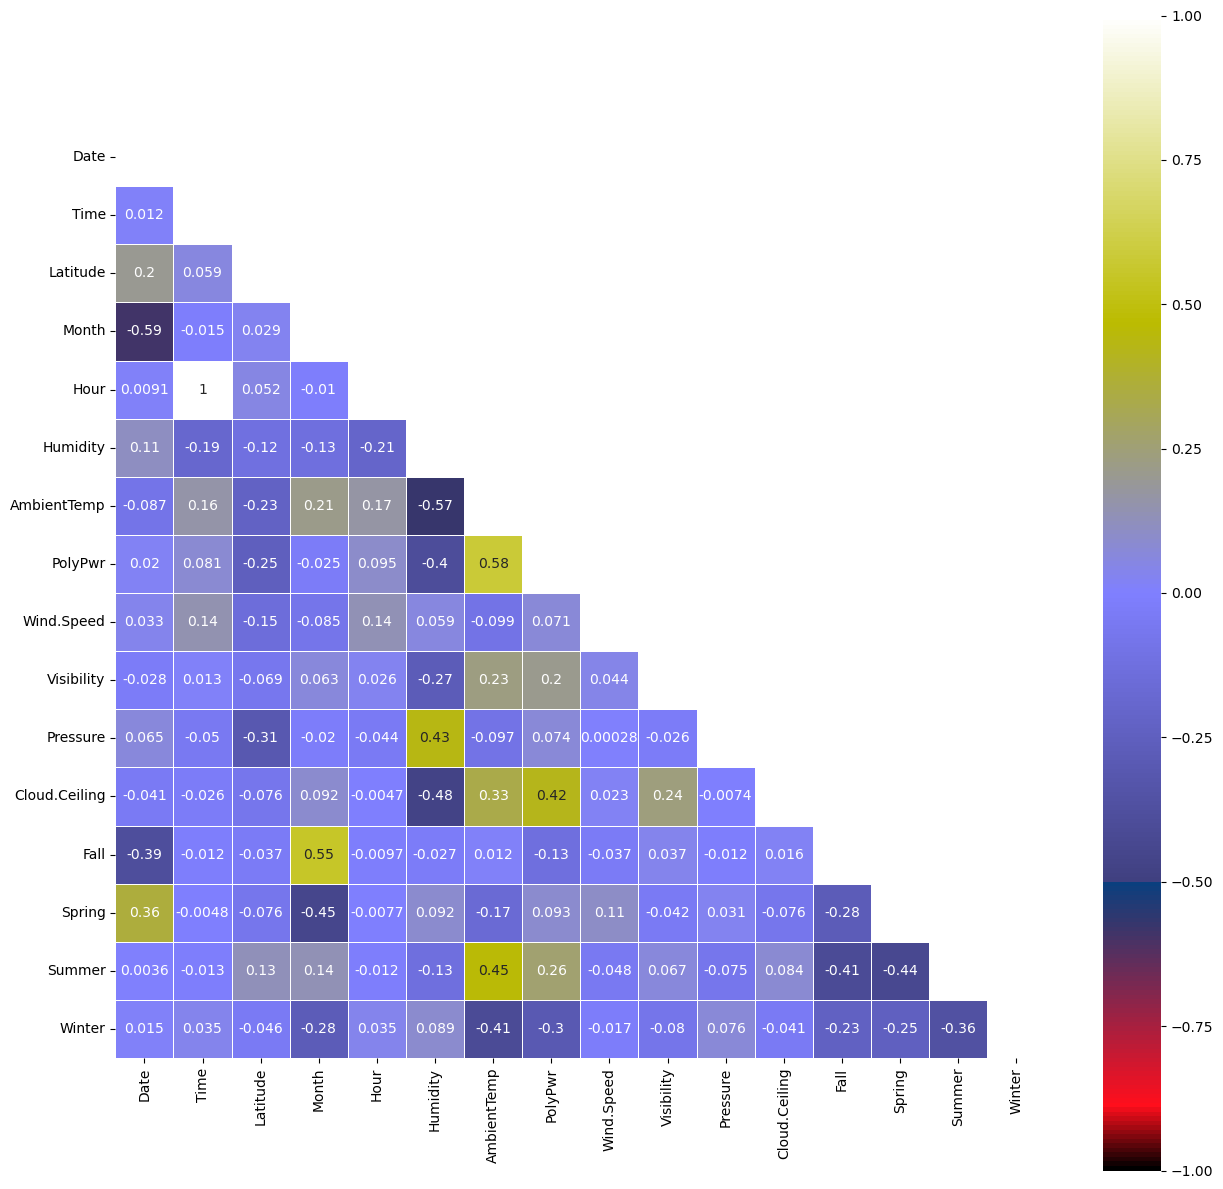

In [23]:
# Correlation object
corr= df_mod.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# PLOT
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True,mask=matrix)
plt.show();


>>## Feature Selection ##

>### Recursive Feature Elimination ###  
>###### ( RFE ) #####

#### Pipeline  ####

>Model

In [24]:
etr = ExtraTreesRegressor()

>Pipeline

In [25]:
rfe = RFE(etr)
pipe_rfe = Pipeline([('scaler', StandardScaler()),('rfe',rfe),('etr',etr)])
add_pipe(pipe_rfe, 'rfe')

'rfe' added to 'pipes'


#### Learning Curve ####

In [26]:
#plot_learning_curve(pipe_rfe,X_train,y_train, title="RFE Learning Curve", cv=cv, n_jobs=-1,scoring='r2');

#### Cross Validate RFE Pipeline

In [31]:
rfe_score = cross_val_score(pipe_rfe, X_train, y_train, cv=cv, n_jobs=-1)
np.mean(rfe_score)

0.64071974650585

In [32]:
X_train

Date  Time  Latitude  Month  Hour  Humidity  AmbientTemp  \
6980   20180107  1000     20.89      1    10  72.45483     25.14549   
6848   20171118  1000     20.89     11    10  60.62622     27.81425   
11228  20180816  1445     33.90      8    14  34.44214     38.78387   
7471   20180502  1100     20.89      5    11  66.95557     30.27908   
10609  20180327  1300     33.90      3    13   9.68018     24.57901   
...         ...   ...       ...    ...   ...       ...          ...   
20170  20180525  1100     38.95      5    11  17.75513     36.16295   
17559  20180412  1100     38.16      4    11  40.58228     18.13873   
10044  20171121  1200     33.90     11    12   9.35669     32.92770   
4607   20180717  1100     41.15      7    11  22.62573     37.46964   
9078   20180815  1000     47.52      8    10  26.34277     26.39175   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Fall  Spring  Summer  \
6980           24        10.0    1019.9            722     0       0       0   
6848            8        10.0    1011.1            722     1       0       0   
11228           9        10.0     960.8            722     0       0       1   
7471           20        10.0    1016.5            110     0       1       0   
10609          18        10.0     963.7            722     0       1       0   
...           ...         ...       ...            ...   ...     ...     ...   
20170           9        10.0     801.7            722     0       1       0   
17559           6        10.0    1022.1            722     0       1       0   
10044           6        10.0     964.7            722     1       0       0   
4607            9        10.0     857.8            722     0       0       1   
9078            8        10.0     894.2            722     0       0       1   

       Winter  
6980        1  
6848        0  
11228       0  
7471        0  
10609       0  
...       ...  
20170       0  
17559       0  
10044       0  
4607        0  
9078        0  

[16836 rows x 15 columns]

###### Get Feature Importances

In [33]:
#    FIT
pipe_rfe.fit(X_train, y_train)

#    ATTR KEY
attribute_rfe = pipe_rfe.named_steps.etr
support = pipe_rfe.named_steps['rfe'].support_

#    GET IMPORTANCES
feature_importances = pipe_rfe.named_steps['etr'].feature_importances_

#    RANKING DF
f = support
rfe_ranking = pd.DataFrame(support,index=X_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)


##### Display Scores

In [34]:
rfe_score

array([0.65028197, 0.64123844, 0.63063883])

##### Display Importances

In [35]:
for name, importance in zip(X_train.loc[:,:], feature_importances):
    print(name, "=", importance)

Date = 0.09345968100465635
Time = 0.09523044478051884
Latitude = 0.14719758879904027
Month = 0.11725597228335276
Hour = 0.27666736747356496
Humidity = 0.09443615756332517
AmbientTemp = 0.1757527880955418


##### Plot Importances

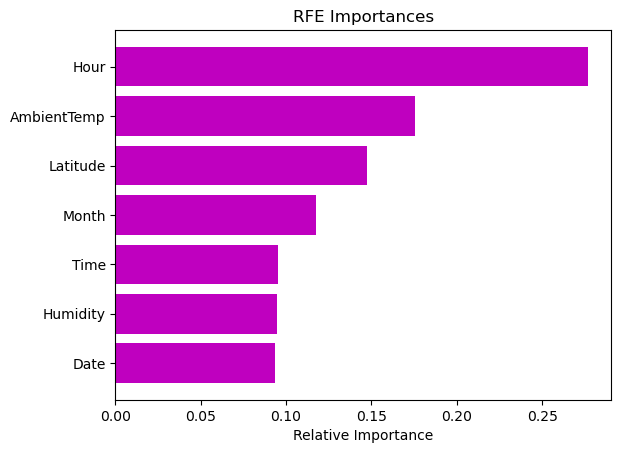

In [36]:
features = X_train.columns
importances = feature_importances
indices = np.argsort(importances)

plt.title('RFE Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

indices = np.argsort(importances)

In [37]:
X_train

Date  Time  Latitude  Month  Hour  Humidity  AmbientTemp  \
6980   20180107  1000     20.89      1    10  72.45483     25.14549   
6848   20171118  1000     20.89     11    10  60.62622     27.81425   
11228  20180816  1445     33.90      8    14  34.44214     38.78387   
7471   20180502  1100     20.89      5    11  66.95557     30.27908   
10609  20180327  1300     33.90      3    13   9.68018     24.57901   
...         ...   ...       ...    ...   ...       ...          ...   
20170  20180525  1100     38.95      5    11  17.75513     36.16295   
17559  20180412  1100     38.16      4    11  40.58228     18.13873   
10044  20171121  1200     33.90     11    12   9.35669     32.92770   
4607   20180717  1100     41.15      7    11  22.62573     37.46964   
9078   20180815  1000     47.52      8    10  26.34277     26.39175   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Fall  Spring  Summer  \
6980           24        10.0    1019.9            722     0       0       0   
6848            8        10.0    1011.1            722     1       0       0   
11228           9        10.0     960.8            722     0       0       1   
7471           20        10.0    1016.5            110     0       1       0   
10609          18        10.0     963.7            722     0       1       0   
...           ...         ...       ...            ...   ...     ...     ...   
20170           9        10.0     801.7            722     0       1       0   
17559           6        10.0    1022.1            722     0       1       0   
10044           6        10.0     964.7            722     1       0       0   
4607            9        10.0     857.8            722     0       0       1   
9078            8        10.0     894.2            722     0       0       1   

       Winter  
6980        1  
6848        0  
11228       0  
7471        0  
10609       0  
...       ...  
20170       0  
17559       0  
10044       0  
4607        0  
9078        0  

[16836 rows x 15 columns]

>### Recursive Feature Extraction w/ Cross Validation ###
>###### ( RFECV ) #####

#### Pipeline

>Model

In [38]:
etr_2 = ExtraTreesRegressor()

>Build / Add Pipe

In [39]:
rfecv = RFECV(etr_2)
pipe_rfecv = Pipeline([('scaler', StandardScaler()),('rfecv',rfecv),('etr_2',etr_2)])
add_pipe(pipe_rfecv, 'rfecv')

'rfecv' added to 'pipes'


#### Learning Curve ####

In [40]:
#plot_learning_curve(pipe_rfecv,X_train,y_train, title="RFECV Learning Curve", cv=cv, n_jobs=-1,scoring='r2');

##### Get Feature Importances

In [41]:
X_train

Date  Time  Latitude  Month  Hour  Humidity  AmbientTemp  \
6980   20180107  1000     20.89      1    10  72.45483     25.14549   
6848   20171118  1000     20.89     11    10  60.62622     27.81425   
11228  20180816  1445     33.90      8    14  34.44214     38.78387   
7471   20180502  1100     20.89      5    11  66.95557     30.27908   
10609  20180327  1300     33.90      3    13   9.68018     24.57901   
...         ...   ...       ...    ...   ...       ...          ...   
20170  20180525  1100     38.95      5    11  17.75513     36.16295   
17559  20180412  1100     38.16      4    11  40.58228     18.13873   
10044  20171121  1200     33.90     11    12   9.35669     32.92770   
4607   20180717  1100     41.15      7    11  22.62573     37.46964   
9078   20180815  1000     47.52      8    10  26.34277     26.39175   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Fall  Spring  Summer  \
6980           24        10.0    1019.9            722     0       0       0   
6848            8        10.0    1011.1            722     1       0       0   
11228           9        10.0     960.8            722     0       0       1   
7471           20        10.0    1016.5            110     0       1       0   
10609          18        10.0     963.7            722     0       1       0   
...           ...         ...       ...            ...   ...     ...     ...   
20170           9        10.0     801.7            722     0       1       0   
17559           6        10.0    1022.1            722     0       1       0   
10044           6        10.0     964.7            722     1       0       0   
4607            9        10.0     857.8            722     0       0       1   
9078            8        10.0     894.2            722     0       0       1   

       Winter  
6980        1  
6848        0  
11228       0  
7471        0  
10609       0  
...       ...  
20170       0  
17559       0  
10044       0  
4607        0  
9078        0  

[16836 rows x 15 columns]

In [42]:
#    Taken from Sklearn: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
min_features_to_select = 1

#    FIT
pipe_rfecv.fit(X_train, y_train)

#    ATTR KEY
attribute_rfecv = pipe_rfecv.named_steps.etr_2
support_2 = pipe_rfecv.named_steps['rfecv'].support_

#    GET IMPORTANCES
feature_importances_2 = pipe_rfecv.named_steps['etr_2'].feature_importances_

#    RANKING DF
f = support_2
rfecv_ranking = pd.DataFrame(support,index=X_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 10


#### Plot n_Features vs. CV Scores #####

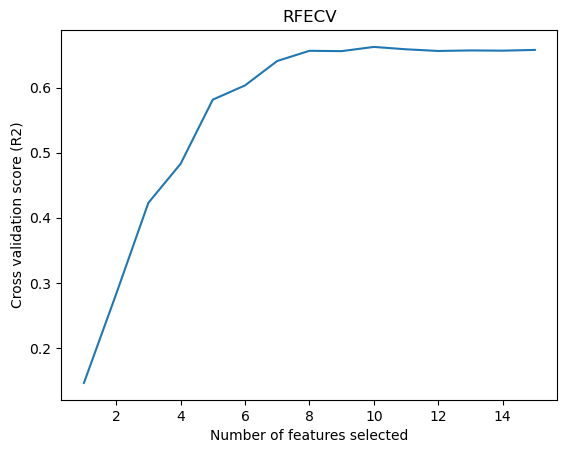

In [43]:
min_features_to_select = 1
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_["mean_test_score"]) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
)
plt.title("RFECV")
plt.show()


##### Display Importances

In [44]:
for name, importance in zip(X_train.loc[:,:], feature_importances_2):
    print(name, "=", importance)

Date = 0.06026266965073515
Time = 0.08605203693434484
Latitude = 0.09431378456843792
Month = 0.07606701201629072
Hour = 0.09623242821144433
Humidity = 0.23551363723317437
AmbientTemp = 0.04963441637587577
Wind.Speed = 0.07416639738127247
Visibility = 0.16684046436819286
Pressure = 0.06091715326023164


##### Plot Importances

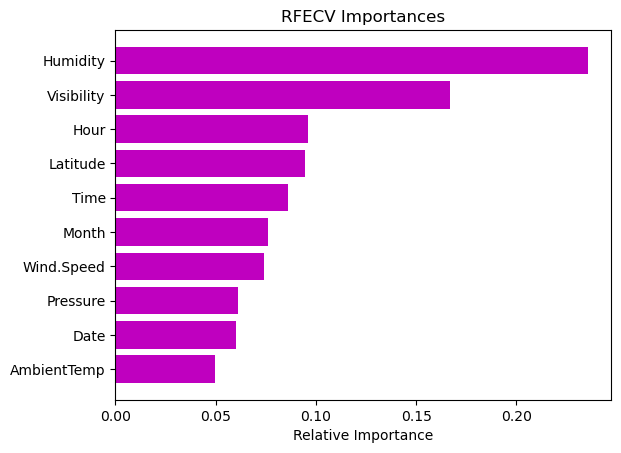

In [45]:
features = X_train.columns
importances = feature_importances_2
indices = np.argsort(importances)

plt.title('RFECV Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


indices = np.argsort(importances)

In [46]:
X_train

Date  Time  Latitude  Month  Hour  Humidity  AmbientTemp  \
6980   20180107  1000     20.89      1    10  72.45483     25.14549   
6848   20171118  1000     20.89     11    10  60.62622     27.81425   
11228  20180816  1445     33.90      8    14  34.44214     38.78387   
7471   20180502  1100     20.89      5    11  66.95557     30.27908   
10609  20180327  1300     33.90      3    13   9.68018     24.57901   
...         ...   ...       ...    ...   ...       ...          ...   
20170  20180525  1100     38.95      5    11  17.75513     36.16295   
17559  20180412  1100     38.16      4    11  40.58228     18.13873   
10044  20171121  1200     33.90     11    12   9.35669     32.92770   
4607   20180717  1100     41.15      7    11  22.62573     37.46964   
9078   20180815  1000     47.52      8    10  26.34277     26.39175   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Fall  Spring  Summer  \
6980           24        10.0    1019.9            722     0       0       0   
6848            8        10.0    1011.1            722     1       0       0   
11228           9        10.0     960.8            722     0       0       1   
7471           20        10.0    1016.5            110     0       1       0   
10609          18        10.0     963.7            722     0       1       0   
...           ...         ...       ...            ...   ...     ...     ...   
20170           9        10.0     801.7            722     0       1       0   
17559           6        10.0    1022.1            722     0       1       0   
10044           6        10.0     964.7            722     1       0       0   
4607            9        10.0     857.8            722     0       0       1   
9078            8        10.0     894.2            722     0       0       1   

       Winter  
6980        1  
6848        0  
11228       0  
7471        0  
10609       0  
...       ...  
20170       0  
17559       0  
10044       0  
4607        0  
9078        0  

[16836 rows x 15 columns]

### Transform Data

>TRAINING

In [47]:
# FIT
pipe_rfecv.fit(X_train, y_train)
# ATTR KEY
attribute_rfecv = pipe_rfecv.named_steps.rfecv
f = attribute_rfecv.get_support(1)
# transform
X_train_sel = X_train[X_train.columns[f]]

In [48]:
X_train_sel.columns

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

>TEST

In [49]:
X_train.columns[f]

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

In [50]:
X_test_sel = X_test[X_train.columns[f]]           # transform

In [51]:
X_test_sel.columns

Index(['Date', 'Time', 'Latitude', 'Month', 'Humidity', 'AmbientTemp',
       'Wind.Speed', 'Pressure', 'Cloud.Ceiling', 'Winter'],
      dtype='object')

#### New Column Index ######

In [52]:
columns_sel = {}
for i in range(len(X_train_sel.columns)):
     columns_sel[i] = X_train_sel.columns[i]
columns_sel = pd.DataFrame.from_dict(columns_sel,orient='index')
columns_sel

0
0           Date
1           Time
2       Latitude
3          Month
4       Humidity
5    AmbientTemp
6     Wind.Speed
7       Pressure
8  Cloud.Ceiling
9         Winter

##### Pair Plot

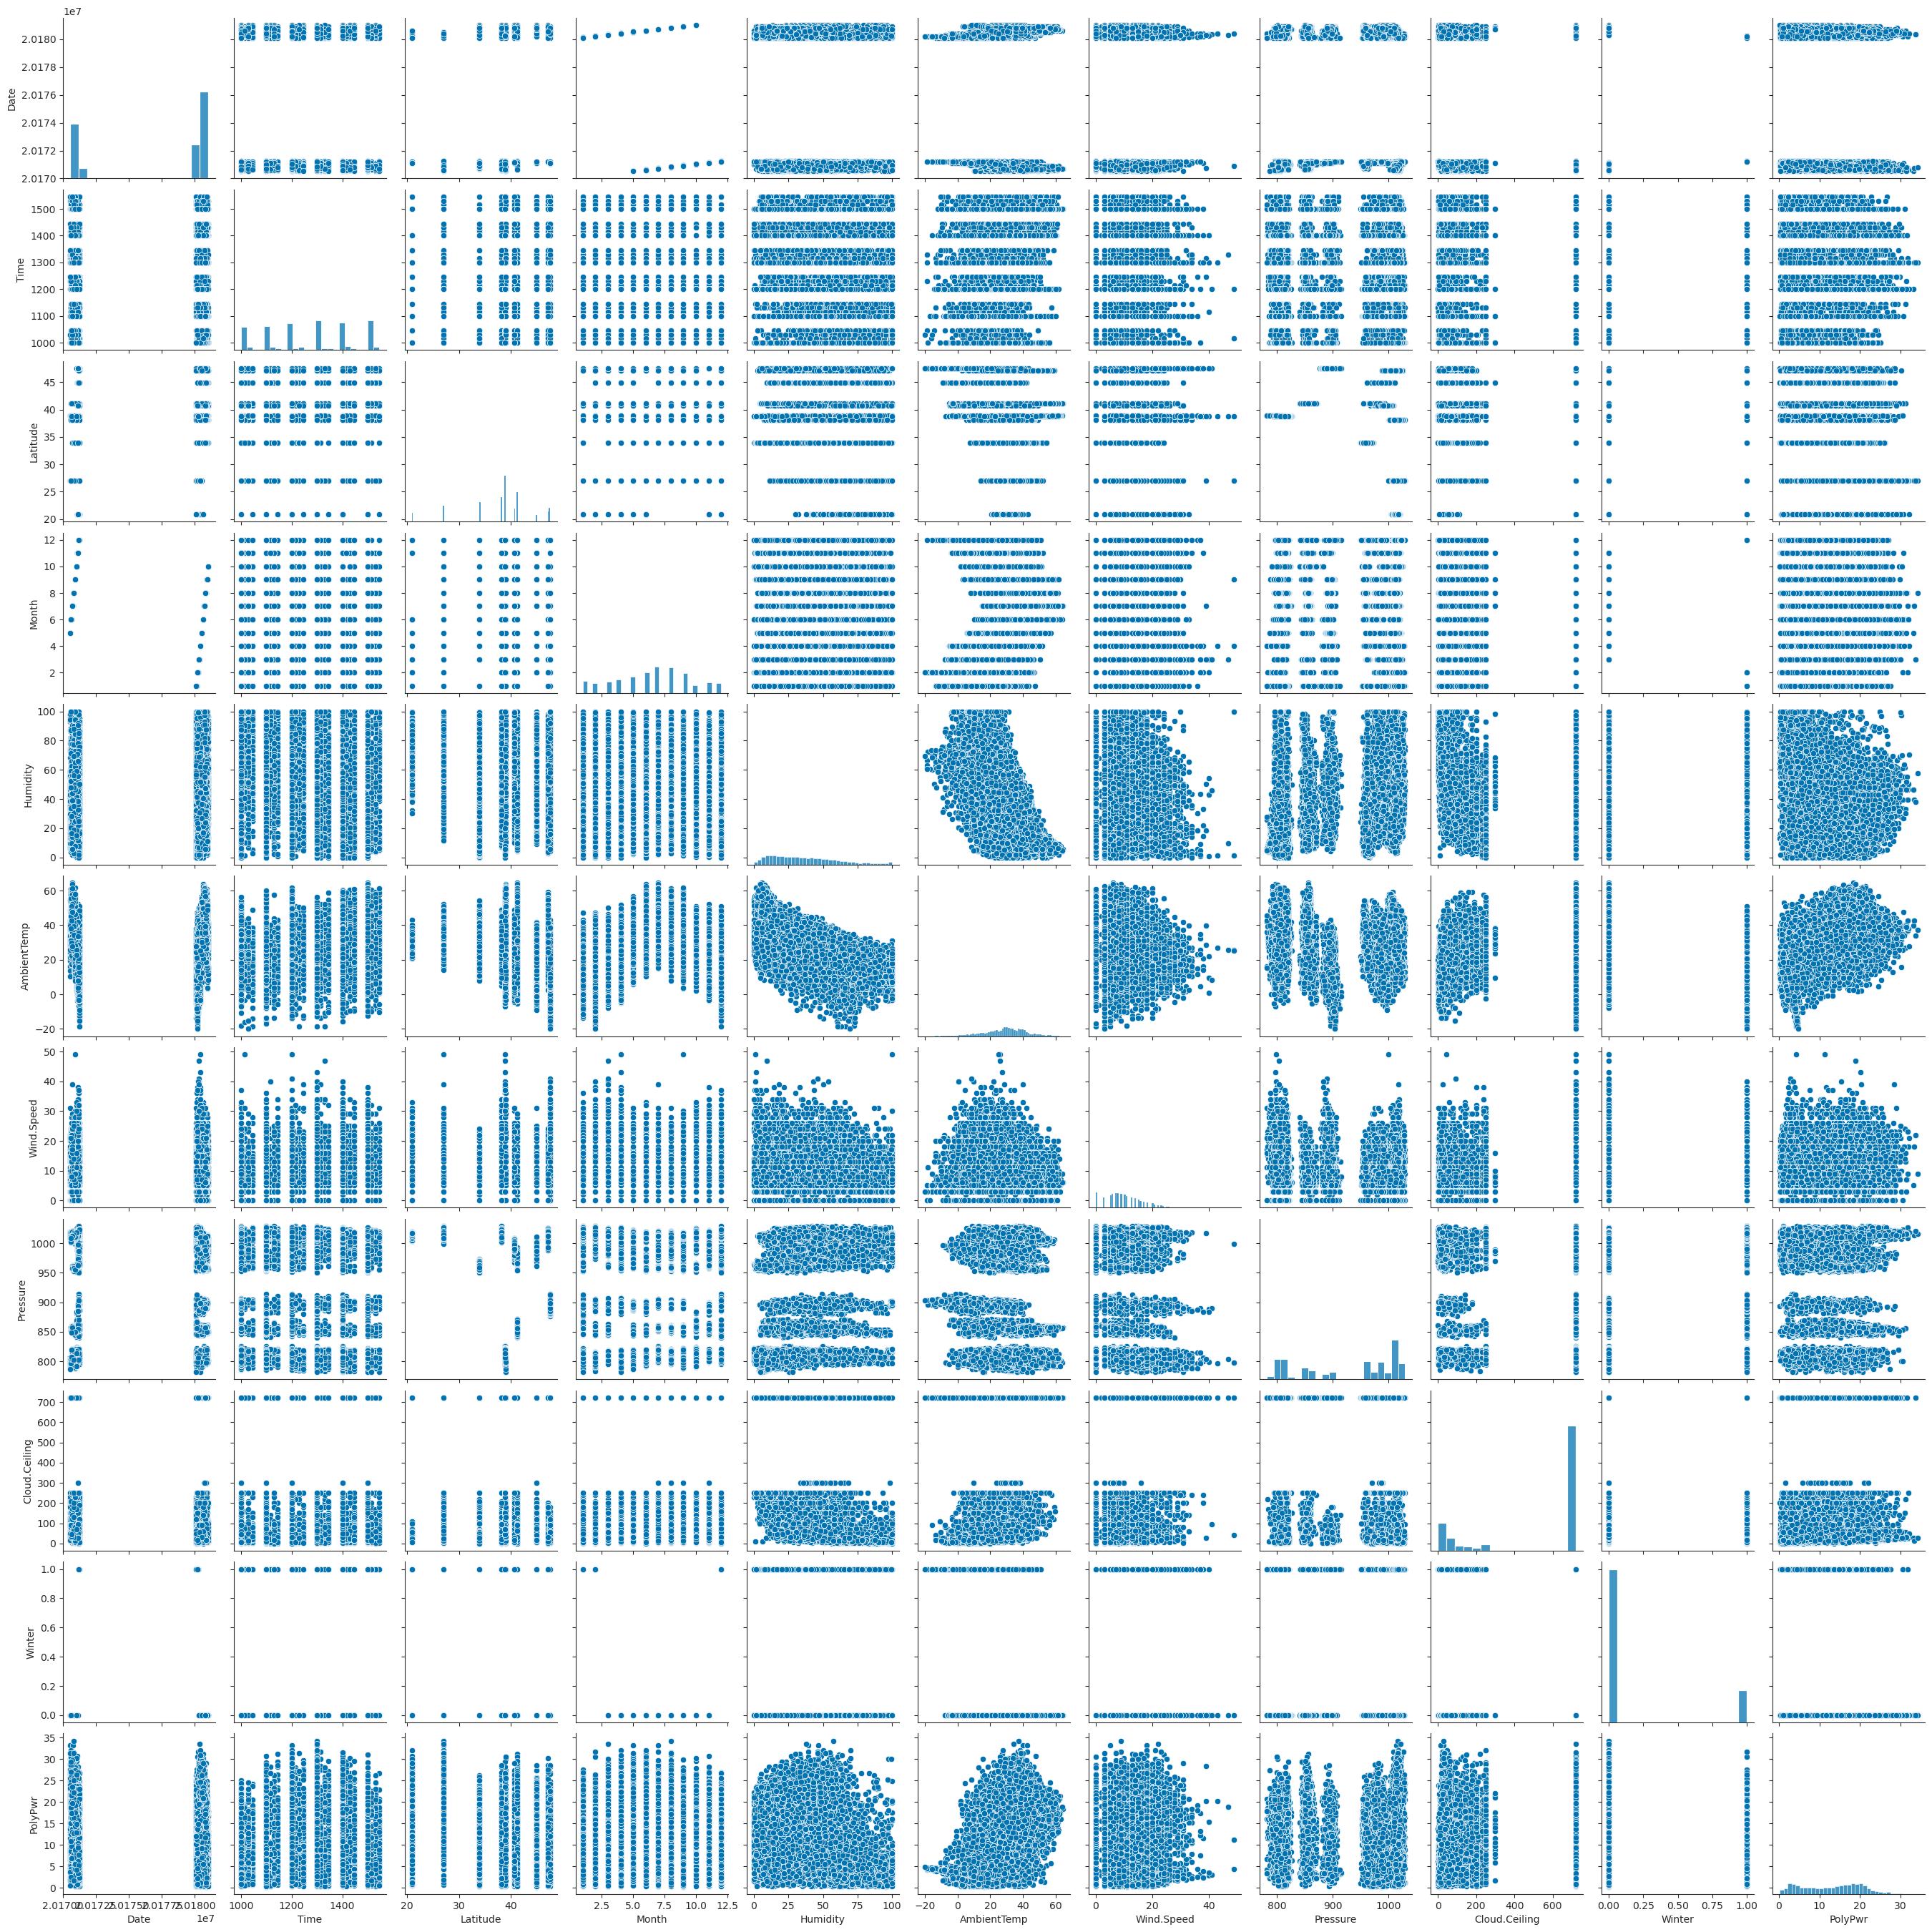

In [133]:
df_train_sel = pd.concat((X_train_sel,y_train), axis = 1)
sns.pairplot(df_train_sel);



>>## Models ##

>### Dummy Regressor ###  
>*( Baseline )*

#### Model ####

In [134]:
dummy = DummyRegressor()

#### Pipeline ####

In [135]:
pipe_dummy = Pipeline([('scaler', StandardScaler()),('dummy', DummyRegressor())])
add_pipe(pipe_dummy, 'dummy')

'dummy' added to 'pipes'


> #### Learning Curve ####

In [137]:
#plot_lc('dummy')

#### Cross Validation ####

In [138]:
score_dummy = cross_val_predict(pipe_dummy, X_train_sel, y_train, cv = cv,n_jobs=-1)

> #### KFold Validation ####

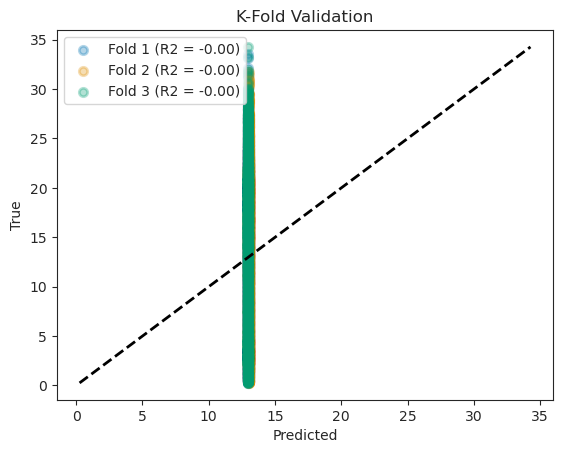

In [139]:
scores_ = []
fig = plt.figure()
i = 1
for train, test in cv.split(X_train_sel, y_train):
    model = DummyRegressor()
    prediction = pipe_dummy.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3,
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()


### Test: Dummy ###


#### Initiate Model ####

In [140]:
test_dummy = pipes['dummy']

#### Fit ####

In [141]:
test_dummy.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dummy', DummyRegressor())])

##### Predict #####

In [142]:
pred_dummy = test_dummy.predict(X_test_sel)

##### Scores

> Store Scores  

In [143]:
dummy_mae = mean_absolute_error(y_test, pred_dummy)
dummy_rmse = mean_squared_error(y_test, pred_dummy, squared=False)
dummy_r2 = r2_score(y_test, pred_dummy)
dummy_ev = explained_variance_score(y_test, pred_dummy)

dummy_scores = {"MAE":dummy_mae,
             "RMSE":dummy_rmse,
             "R2":dummy_r2,
               "Expl_Var":dummy_ev}

> Display Score

In [144]:
print("Scores for Dummy Model:")
print()
for k,v in dummy_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")


Scores for Dummy Model:

MAE      :  6.17
RMSE     : 7.124
R2       :  -0.0
Expl_Var :   0.0


> Add Results to 'scores'

In [145]:
add_scores(dummy_scores, 'Dummy')

'Dummy' added to 'scores'


##### Display Results #####

In [146]:
print("Scores for SGD Model:")
print()
for k,v in dummy_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")


Scores for SGD Model:

MAE      :  6.17
RMSE     : 7.124
R2       :  -0.0
Expl_Var :   0.0


##### Plot Predictions vs True

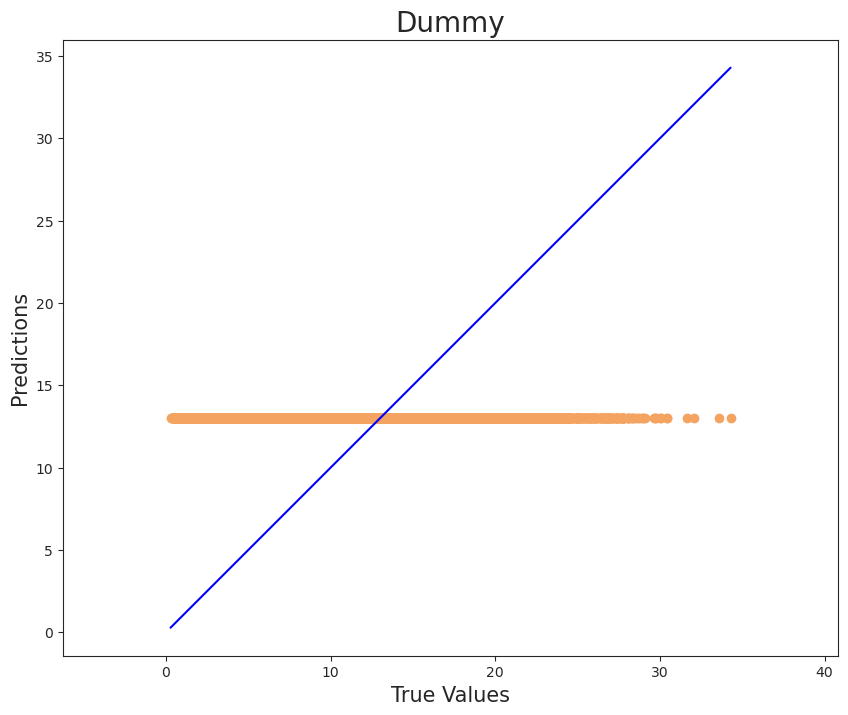

In [147]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_dummy, c='sandybrown')
plt.title("Dummy", fontsize=20)
p1 = max(max(pred_dummy), max(y_test))
p2 = min(min(pred_dummy), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

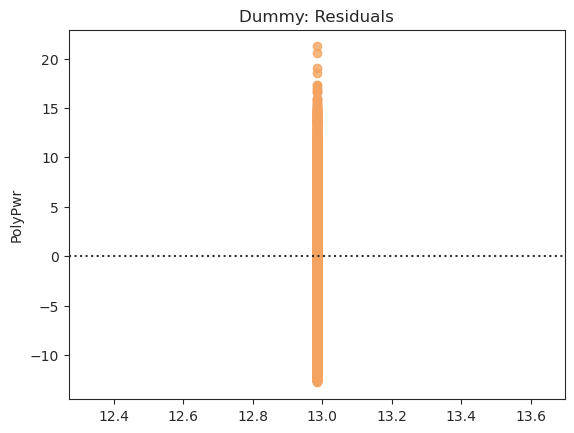

In [148]:
sns.residplot(x=pred_dummy, y=y_test,data=X_test_sel,color='sandybrown')
plt.title("Dummy: Residuals");

##### JointPlot

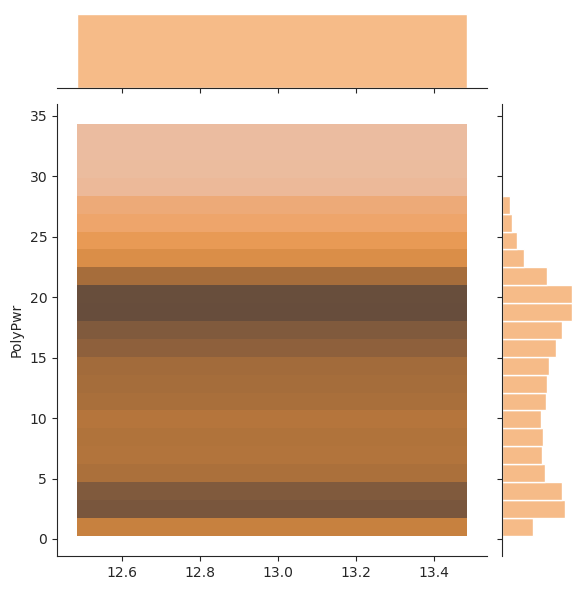

In [149]:
sns.jointplot(x=pred_dummy, y=y_test, data=X_test_sel, kind="hist", color='sandybrown');

>### RandomForest ###
>##### ( Linear Regression ) #####

#### Model ####

In [166]:
rfr = RandomForestRegressor(n_estimators=50, max_features='auto')

#### Pipeline  ####

In [167]:
pipe_rfr = Pipeline([('scaler', StandardScaler()), ('rfr', rfr)])
add_pipe(pipe_rfr, 'rfr')

A pipe called 'rfr' already exists!
Enter another name:]
'' added to 'pipes'


 #### Learning Curve  ####

In [168]:
#plot_lc('rfr')

Perform Cross-validation on training data for hyper-parameter tuning   
( The following code is from Olaowe. )

## Fit Random Search Model #####

The next takes 10+ hours to run.

To conitune with the saved results,

skip down to the cell that reads: "SKIP-TO-POINT"

#### Hyper-parameters to Tune ###


In [169]:
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
max_features_list = ['auto', 'sqrt']
max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
bootstrap_list = [True, False]

##### Dictionary of Parameters ####


In [170]:
grid_rfr = {'rfr__n_estimators': n_estimators_list,
           'rfr__max_features': max_features_list,
           'rfr__max_depth': max_depth_list,
           'rfr__min_samples_split': min_samples_split_list,
           'rfr__min_samples_leaf': min_samples_leaf_list,
           'rfr__bootstrap': bootstrap_list}

##### Create Random Search #####


In [171]:
rcv_rfr = RandomizedSearchCV(estimator=pipe_rfr, param_distributions=grid_rfr,
                                 n_iter=500, cv=3, verbose=2, random_state=42,
                                 n_jobs=-1)


In [172]:
%%time

rcv_rfr.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

KeyboardInterrupt: 

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create example data
X, y = make_regression(n_features=10, n_samples=100, random_state=42)

# Instantiate the RandomForestRegressor with max_features set to 1.0
rfr = RandomForestRegressor(n_estimators=50, max_features=1.0)

# Create the pipeline
pipe_rfr = Pipeline([('scaler', StandardScaler()), ('rfr', rfr)])

# Define hyperparameter grid
n_estimators_list = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]
max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]
bootstrap_list = [True, False]

grid_rfr = {
    'rfr__n_estimators': n_estimators_list,
    'rfr__max_depth': max_depth_list,
    'rfr__min_samples_split': min_samples_split_list,
    'rfr__min_samples_leaf': min_samples_leaf_list,
    'rfr__bootstrap': bootstrap_list
}

# Create the RandomizedSearchCV object
rcv_rfr = RandomizedSearchCV(
    estimator=pipe_rfr,
    param_distributions=grid_rfr,
    n_iter=500,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
rcv_rfr.fit(X_train, y_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV] END rfr__bootstrap=False, rfr__max_depth=80, rfr__min_samples_leaf=4, rfr__min_samples_split=5, rfr__n_estimators=118; total time=  16.3s
[CV] END rfr__bootstrap=True, rfr__max_depth=80, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=163; total time=  18.6s
[CV] END rfr__bootstrap=False, rfr__max_depth=60, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=681; total time= 2.5min
[CV] END rfr__bootstrap=True, rfr__max_depth=110, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=827; total time= 1.6min
[CV] END rfr__bootstrap=True, rfr__max_depth=40, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=327; total time=  42.2s
[CV] END rfr__bootstrap=False, rfr__max_depth=90, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=127; total time=  25.5s
[CV] END rfr__bootstrap=False, rfr__max_depth=90, rfr__min_samples_leaf=1, rfr__

[CV] END rfr__bootstrap=False, rfr__max_depth=80, rfr__min_samples_leaf=4, rfr__min_samples_split=5, rfr__n_estimators=118; total time=  16.4s
[CV] END rfr__bootstrap=True, rfr__max_depth=80, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=163; total time=  18.4s
[CV] END rfr__bootstrap=True, rfr__max_depth=80, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=163; total time=  19.2s
[CV] END rfr__bootstrap=False, rfr__max_depth=60, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=681; total time= 2.6min
[CV] END rfr__bootstrap=True, rfr__max_depth=70, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=518; total time=  57.7s
[CV] END rfr__bootstrap=True, rfr__max_depth=40, rfr__min_samples_leaf=1, rfr__min_samples_split=10, rfr__n_estimators=518; total time=  53.5s
[CV] END rfr__bootstrap=False, rfr__max_depth=80, rfr__min_samples_leaf=4, rfr__min_samples_split=2, rfr__n_estimators=490; total time= 1.3min
[C

[CV] END rfr__bootstrap=True, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=545; total time=  58.9s
[CV] END rfr__bootstrap=False, rfr__max_depth=60, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=681; total time= 2.6min
[CV] END rfr__bootstrap=False, rfr__max_depth=50, rfr__min_samples_leaf=1, rfr__min_samples_split=10, rfr__n_estimators=963; total time= 2.6min
[CV] END rfr__bootstrap=True, rfr__max_depth=80, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=336; total time=  38.4s
[CV] END rfr__bootstrap=True, rfr__max_depth=60, rfr__min_samples_leaf=4, rfr__min_samples_split=10, rfr__n_estimators=136; total time=  12.7s
[CV] END rfr__bootstrap=True, rfr__max_depth=100, rfr__min_samples_leaf=4, rfr__min_samples_split=10, rfr__n_estimators=800; total time= 1.3min
[CV] END rfr__bootstrap=False, rfr__max_depth=70, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=863; total time= 2.7m

[CV] END rfr__bootstrap=True, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=545; total time=  59.3s
[CV] END rfr__bootstrap=True, rfr__max_depth=90, rfr__min_samples_leaf=4, rfr__min_samples_split=10, rfr__n_estimators=545; total time= 1.0min
[CV] END rfr__bootstrap=False, rfr__max_depth=50, rfr__min_samples_leaf=4, rfr__min_samples_split=5, rfr__n_estimators=272; total time=  42.8s
[CV] END rfr__bootstrap=True, rfr__max_depth=110, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=827; total time= 1.7min
[CV] END rfr__bootstrap=True, rfr__max_depth=40, rfr__min_samples_leaf=1, rfr__min_samples_split=10, rfr__n_estimators=518; total time=  52.6s
[CV] END rfr__bootstrap=False, rfr__max_depth=80, rfr__min_samples_leaf=4, rfr__min_samples_split=2, rfr__n_estimators=490; total time= 1.3min
[CV] END rfr__bootstrap=False, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=827; total time= 2.4

[CV] END rfr__bootstrap=True, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=872; total time= 1.6min
[CV] END rfr__bootstrap=False, rfr__max_depth=50, rfr__min_samples_leaf=4, rfr__min_samples_split=5, rfr__n_estimators=272; total time=  47.0s
[CV] END rfr__bootstrap=True, rfr__max_depth=60, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=563; total time= 1.1min
[CV] END rfr__bootstrap=True, rfr__max_depth=70, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=518; total time=  57.7s
[CV] END rfr__bootstrap=True, rfr__max_depth=40, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=327; total time=  42.8s
[CV] END rfr__bootstrap=True, rfr__max_depth=40, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=327; total time=  48.2s
[CV] END rfr__bootstrap=False, rfr__max_depth=90, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=127; total time=  23.7s
[C

[CV] END rfr__bootstrap=True, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=872; total time= 1.6min
[CV] END rfr__bootstrap=True, rfr__max_depth=90, rfr__min_samples_leaf=4, rfr__min_samples_split=10, rfr__n_estimators=545; total time= 1.0min
[CV] END rfr__bootstrap=True, rfr__max_depth=60, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=563; total time= 1.2min
[CV] END rfr__bootstrap=False, rfr__max_depth=50, rfr__min_samples_leaf=1, rfr__min_samples_split=10, rfr__n_estimators=963; total time= 2.7min
[CV] END rfr__bootstrap=False, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=827; total time= 2.4min
[CV] END rfr__bootstrap=True, rfr__max_depth=30, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=236; total time=  30.3s
[CV] END rfr__bootstrap=False, rfr__max_depth=60, rfr__min_samples_leaf=1, rfr__min_samples_split=5, rfr__n_estimators=972; total time= 2.8m

[CV] END rfr__bootstrap=False, rfr__max_depth=80, rfr__min_samples_leaf=4, rfr__min_samples_split=5, rfr__n_estimators=118; total time=  16.0s
[CV] END rfr__bootstrap=True, rfr__max_depth=None, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=872; total time= 1.8min
[CV] END rfr__bootstrap=True, rfr__max_depth=60, rfr__min_samples_leaf=2, rfr__min_samples_split=2, rfr__n_estimators=563; total time= 1.2min
[CV] END rfr__bootstrap=True, rfr__max_depth=70, rfr__min_samples_leaf=2, rfr__min_samples_split=5, rfr__n_estimators=518; total time= 1.0min
[CV] END rfr__bootstrap=False, rfr__max_depth=50, rfr__min_samples_leaf=1, rfr__min_samples_split=10, rfr__n_estimators=963; total time= 2.6min
[CV] END rfr__bootstrap=True, rfr__max_depth=100, rfr__min_samples_leaf=4, rfr__min_samples_split=10, rfr__n_estimators=800; total time= 1.3min
[CV] END rfr__bootstrap=False, rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__min_samples_split=2, rfr__n_estimators=372; total time= 1.4

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfr',
                                              RandomForestRegressor(n_estimators=50))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'rfr__bootstrap': [True, False],
                                        'rfr__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'rfr__min_samples_leaf': [1, 2, 4],
                                        'rfr__min_samples_split': [2, 5, 10],
                                        'rfr__n_estimators': [100, 109, 118,
                                                              127, 136, 145,
                                                              154, 163, 172,
                                                              181, 190, 200,
                                                              209, 218, 227,
                                                              236, 245, 254,
                                                              263, 272, 281,
                                                              290, 300, 309,
                                                              318, 327, 336,
                                                              345, 354, 363, ...]},
                   random_state=42, verbose=2)

#### RCV Results: RFR ####

CPU times: user 23.8 s, sys: 1.98 s, total: 25.8 s
Wall time: 4h 26min 56s
RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfr',
                                              RandomForestRegressor(n_estimators=50))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'rfr__bootstrap': [True, False],
                                        'rfr__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'rfr__max_features': ['auto', 'sqrt'],
                                        'rfr__min_samples_leaf': [1, 2, 4],
                                        'rfr__min_samples_split': [2, 5, 10],
                                        'rfr__n_estimators': [100, 109, 118,
                                                              127, 136, 145,
                                                              154, 163, 172,
                                                              181, 190, 200,
                                                              209, 218, 227,
                                                              236, 245, 254,
                                                              263, 272, 281,
                                                              290, 300, 309,
                                                              318, 327, 336,
                                                              345, 354, 363, ...]},
                   random_state=42, verbose=2)

##### Best Estimator
( skip )

In [175]:
best_rfr = rcv_rfr.best_estimator_

##### RCV Scores

In [176]:
mean_score_rfr = rcv_rfr.cv_results_['mean_test_score']
std_score_rfr = rcv_rfr.cv_results_['std_test_score']
params_rfr = rcv_rfr.cv_results_['params']

In [177]:
cv_score_df = pd.DataFrame(params_rfr)
cv_score_df['mean_score_rfr'] = mean_score_rfr
cv_score_df['std_score_rfr'] = std_score_rfr

In [178]:
breakdown_rfr = {"Index": rcv_rfr.best_index_,
"Params" : rcv_rfr.best_params_,
"Estimator" : rcv_rfr.best_estimator_,
"Score" : rcv_rfr.best_score_}

##### Run Cell to use saved Hyper-Parameters

> SKIP-TO-POINT

In [179]:
best_rfr = Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(bootstrap=False, max_depth=30,
                                       max_features='sqrt',
                                       min_samples_split=10,
                                       n_estimators=554))])

##### Add Best Estimator to Pipes #####

In [180]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 best_rfr)]), "best_rfr")


'best_rfr' added to 'pipes'


#### K-Fold Scores ####

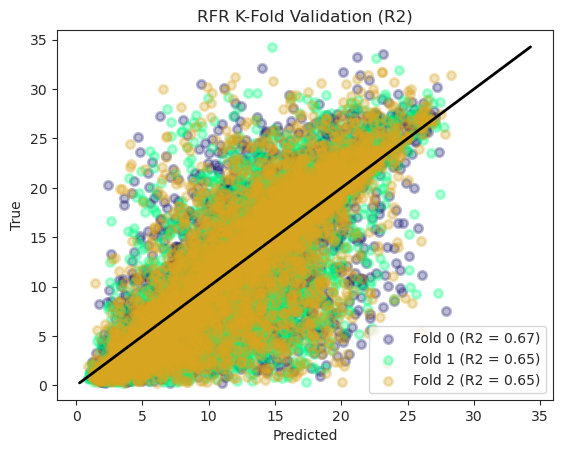

In [181]:
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0
for train, test in cv.split(X_train_sel, y_train):
    model = pipes['best_rfr']
    prediction = pipe_rfr.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i],lw=2, alpha=0.3,
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RFR K-Fold Validation (R2)')
plt.legend()
plt.show()

### Test: RFR ###


#### Initiate Model ####

In [182]:
test_rfr = pipes['best_rfr']

#### Fit ####

In [183]:
test_rfr.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('rfr',
                                  RandomForestRegressor(bootstrap=False,
                                                        max_depth=30,
                                                        max_features='sqrt',
                                                        min_samples_split=10,
                                                        n_estimators=554))]))])

##### Predict #####

In [184]:
pred_rfr = test_rfr.predict(X_test_sel)

##### Scores

> Store Scores  

In [185]:
rfr_mae = mean_absolute_error(y_test, pred_rfr)
rfr_rmse = mean_squared_error(y_test, pred_rfr, squared=False)
rfr_r2 = r2_score(y_test, pred_rfr)
rfr_ev = explained_variance_score(y_test.ravel(), pred_rfr)

rfr_scores = {"MAE":rfr_mae,
             "RMSE":rfr_rmse,
             "R2":rfr_r2,
             "Expl_Var":rfr_ev}

> Add to 'scores'

In [186]:
add_scores(rfr_scores, 'RFR')

'RFR' added to 'scores'


##### Display Results #####

In [187]:
print("Scores for RFR Model:")
print()
for k,v in rfr_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")

Scores for RFR Model:

MAE      : 2.592
RMSE     :  3.97
R2       : 0.689
Expl_Var :  0.69


##### Plot Predictions vs True

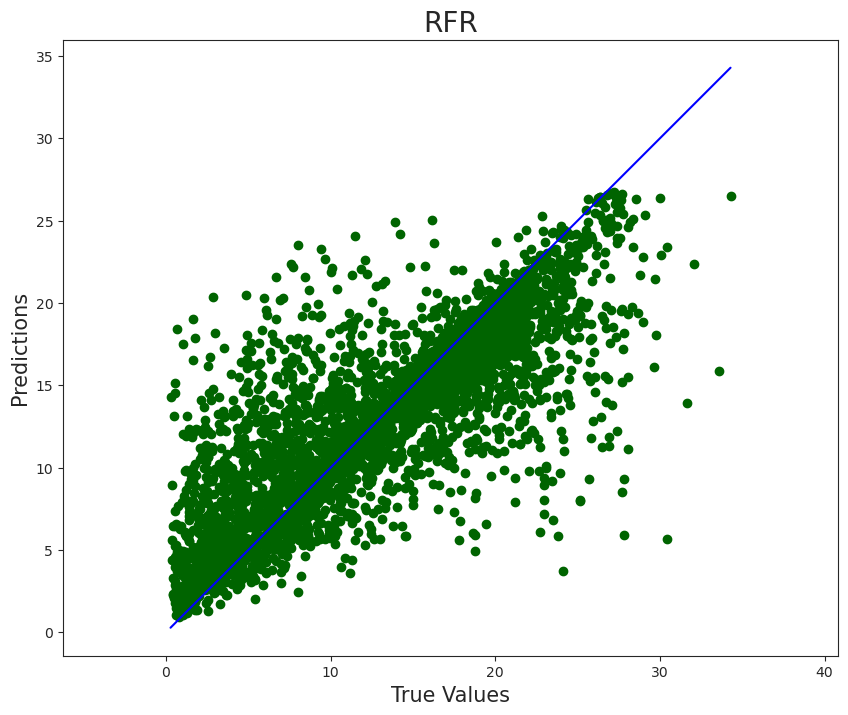

In [188]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_rfr, c='darkgreen')
plt.title("RFR", fontsize=20)
p1 = max(max(pred_rfr), max(y_test))
p2 = min(min(pred_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

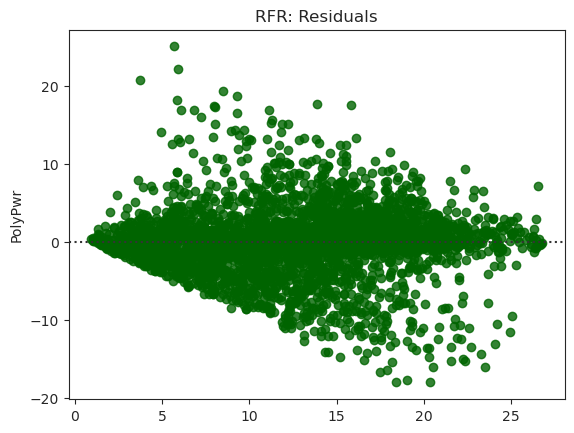

In [189]:
sns.residplot(x=pred_rfr, y=y_test,data=X_test_sel,color='darkgreen')
plt.title("RFR: Residuals");

##### JointPlot

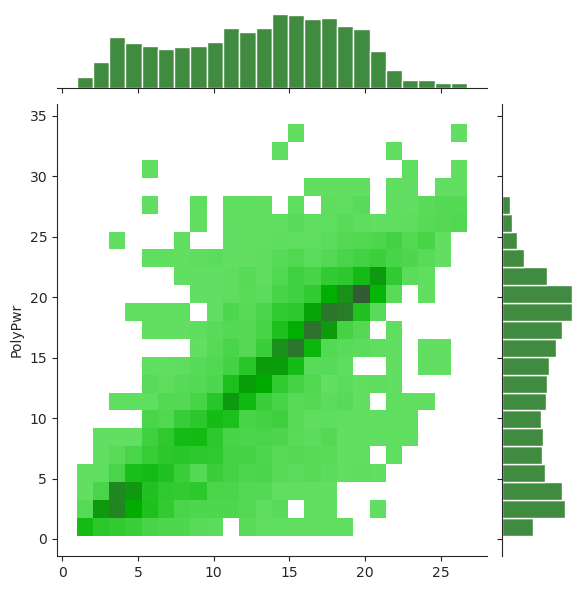

In [190]:
sns.jointplot(x=pred_rfr, y=y_test, data=X_test_sel, kind="hist", color='darkgreen')


>### SGD ###  
>##### ( Linear Regression ) #####

#### Model ####

In [191]:
sgd = SGDRegressor(loss='squared_loss',
                   penalty= 'l2',
                   alpha = 0.01,
                   max_iter = 4500,
                   learning_rate = "optimal",
                   eta0 = 0.01)

#### Pipeline ####



In [192]:
pipe_sgd = Pipeline([('scaler', StandardScaler()), ('sgd', sgd)])
add_pipe(pipe_sgd, 'sgd')

'sgd' added to 'pipes'


 #### Learning Curve  ####

In [194]:
#plot_lc('sgd');

In [196]:
#plot_validation_curve(pipe_sgd, X_train_sel, y_train, cv=cv, param_name='sgd__alpha',param_range=(0.00001,0.1,0.0001),scoring='r2');

## Fit Random Search Model #####

The next few cells take time to run.

To conitune with the saved results,

skip down to the cell that reads: "SKIP-TO-POINT"

#### Hyper-Parameters to Tune ####

In [197]:
loss = ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [1, 10, 100]
average = [True, False]

#### Dictionary of Parameters ####

In [198]:
grid_sgd = {'sgd__loss':loss,
           'sgd__penalty':penalty,
           'sgd__alpha':alpha,
           'sgd__learning_rate':learning_rate,
           'sgd__average':average,
           'sgd__eta0':eta0}

#### Create Random Search ####


In [199]:
rcv_sgd = RandomizedSearchCV(estimator=pipe_sgd, param_distributions=grid_sgd,
                                 n_iter=1500, cv=3, verbose=2, n_jobs=-1)

#### Fit the Random Search Model ####

In [200]:
%%time

rcv_sgd.fit(X_train, y_train)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

[CV] END sgd__alpha=0.0001, sgd__average=True, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=huber, sgd__penalty=l1; total time=   0.3s
[CV] END sgd__alpha=0.0001, sgd__average=True, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=huber, sgd__penalty=l1; total time=   0.3s
[CV] END sgd__alpha=10, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.4s
[CV] END sgd__alpha=10, sgd__average=True, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.6s
[CV] END sgd__alpha=0.0001, sgd__average=True, sgd__eta0=1, sgd__learning_rate=invscaling, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.2s
[CV] END sgd__alpha=1000, sgd__average=True, sgd__eta0=1, sgd__learning_rate=constant, sgd__loss=huber, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=1000, sgd__average=True, sgd__eta0=1, sgd__learning_rate=cons

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.4s
[CV] END sgd__alpha=0.1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.2s
[CV] END sgd__alpha=0.1, sgd__average=True, sgd__eta0=100, sgd__learning_rate=constant, sgd__loss=squared_loss, sgd__penalty=elasticnet; total time=   0.0s
[CV] END sgd__alpha=10, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.5s
[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=10, sgd__learning_rate=constant, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.2s
[CV] END sgd__alpha=1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=optimal, sgd__loss=epsilon_insensitive, sgd__penalty=l2; total time=   0.4s
[CV] END sgd__alpha=1000, sgd__averag

[CV] END sgd__alpha=0.0001, sgd__average=True, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=huber, sgd__penalty=l1; total time=   0.3s
[CV] END sgd__alpha=0.1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.2s
[CV] END sgd__alpha=1, sgd__average=True, sgd__eta0=1, sgd__learning_rate=constant, sgd__loss=huber, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   1.3s
[CV] END sgd__alpha=0.1, sgd__average=True, sgd__eta0=10, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.7s
[CV] END sgd__alpha=1000, sgd__average=False, sgd__eta0=100, sgd__learning_rate=constant, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=1000, sgd__average=False, sgd__eta0=

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.4s
[CV] END sgd__alpha=1, sgd__average=True, sgd__eta0=1, sgd__learning_rate=constant, sgd__loss=huber, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=1, sgd__average=True, sgd__eta0=1, sgd__learning_rate=constant, sgd__loss=huber, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=0.1, sgd__average=True, sgd__eta0=100, sgd__learning_rate=constant, sgd__loss=squared_loss, sgd__penalty=elasticnet; total time=   0.0s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   1.3s
[CV] END sgd__alpha=0.1, sgd__average=True, sgd__eta0=10, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.6s
[CV] END sgd__alpha=0.0001, sgd__average=False, sgd__eta0=10, sgd__lear

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=100, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.6s
[CV] END sgd__alpha=0.1, sgd__average=True, sgd__eta0=100, sgd__learning_rate=constant, sgd__loss=squared_loss, sgd__penalty=elasticnet; total time=   0.0s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   1.3s
[CV] END sgd__alpha=1000, sgd__average=True, sgd__eta0=1, sgd__learning_rate=constant, sgd__loss=huber, sgd__penalty=l2; total time=   0.1s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=optimal, sgd__loss=squared_loss, sgd__penalty=l1; total time=   0.0s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=optimal, sgd__loss=squared_loss, sgd__penalty=l1; total time=   0.0s
[CV] END sgd__alpha=0.001, sgd__average=True, sgd__eta0=100, sgd__learning_rate

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=100, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.7s
[CV] END sgd__alpha=100, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=squared_loss, sgd__penalty=l1; total time=   0.0s
[CV] END sgd__alpha=10, sgd__average=True, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.6s
[CV] END sgd__alpha=1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=optimal, sgd__loss=epsilon_insensitive, sgd__penalty=l2; total time=   0.4s
[CV] END sgd__alpha=10, sgd__average=True, sgd__eta0=10, sgd__learning_rate=adaptive, sgd__loss=epsilon_insensitive, sgd__penalty=l1; total time=   0.4s
[CV] END sgd__alpha=0.01, sgd__average=True, sgd__eta0=10, sgd__learning_rate=adaptive, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.5s
[CV] END sgd__alpha=1, sgd__average=False, sgd__

[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.3s
[CV] END sgd__alpha=0.1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=invscaling, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.2s
[CV] END sgd__alpha=10, sgd__average=False, sgd__eta0=1, sgd__learning_rate=adaptive, sgd__loss=squared_epsilon_insensitive, sgd__penalty=l1; total time=   0.4s
[CV] END sgd__alpha=0.001, sgd__average=False, sgd__eta0=10, sgd__learning_rate=constant, sgd__loss=epsilon_insensitive, sgd__penalty=elasticnet; total time=   0.2s
[CV] END sgd__alpha=1, sgd__average=False, sgd__eta0=10, sgd__learning_rate=optimal, sgd__loss=epsilon_insensitive, sgd__penalty=l2; total time=   0.4s
[CV] END sgd__alpha=1000, sgd__average=False, sgd__eta0=10, sgd__learning_rate=adaptive, sgd__loss=squared_loss, sgd__penalty=l1; total time=   0.0s
[CV] END sgd__alpha=1000, sgd__average=False

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/asadb

CPU times: user 21.8 s, sys: 3.61 s, total: 25.4 s
Wall time: 6min 45s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(alpha=0.01,
                                                           learning_rate='optimal',
                                                           loss='squared_loss',
                                                           max_iter=4500))]),
                   n_iter=1500, n_jobs=-1,
                   param_distributions={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 10, 100, 1000],
                                        'sgd__average': [True, False],
                                        'sgd__eta0': [1, 10, 100],
                                        'sgd__learning_rate': ['constant',
                                                               'optimal',
                                                               'invscaling',
                                                               'adaptive'],
                                        'sgd__loss': ['squared_loss', 'huber',
                                                      'epsilon_insensitive',
                                                      'squared_epsilon_insensitive'],
                                        'sgd__penalty': ['l1', 'l2',
                                                         'elasticnet']},
                   verbose=2)

CPU times: user 19.6 s, sys: 2.78 s, total: 22.3 s
Wall time: 14min 44s
RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(alpha=0.01,
                                                           learning_rate='optimal',
                                                           max_iter=4500))]),
                   n_iter=1500, n_jobs=-1,
                   param_distributions={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 10, 100, 1000],
                                        'sgd__average': [True, False],
                                        'sgd__eta0': [1, 10, 100],
                                        'sgd__learning_rate': ['constant',
                                                               'optimal',
                                                               'invscaling',
                                                               'adaptive'],
                                        'sgd__loss': ['squared_loss', 'huber',
                                                      'epsilon_insensitive',
                                                      'squared_epsilon_insensitive'],
                                        'sgd__penalty': ['l1', 'l2',
                                                         'elasticnet']},
                   verbose=2)

##### Best Estimator
( Skip )

In [201]:
best_sgd = rcv_sgd.best_estimator_


##### CV Scores

In [202]:
mean_score_sgd = rcv_sgd.cv_results_['mean_test_score']
std_score_sgd = rcv_sgd.cv_results_['std_test_score']
params_sgd = rcv_sgd.cv_results_['params']

In [203]:
cv_score_df = pd.DataFrame(params_sgd)
cv_score_df['mean_score_sgd'] = mean_score_sgd
cv_score_df['std_score_sgd'] = std_score_sgd

In [204]:
breakdown_sgd = {"Index": rcv_sgd.best_index_,
"Params" : rcv_sgd.best_params_,
"Estimator" : rcv_sgd.best_estimator_,
"Score" : rcv_sgd.best_score_}

##### Run Cell to use saved Hyper-Parameters

> SKIP-TO-POINT

In [205]:
best_sgd = SGDRegressor(eta0=1, learning_rate='adaptive',
            loss='squared_epsilon_insensitive',
            max_iter=4500, penalty='elasticnet')

#### Add to Pipes ####

In [206]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', best_sgd)]), 'best_sgd')

'best_sgd' added to 'pipes'


#### Learning Curves ####

In [208]:
#plot_lc('best_sgd')

#### K-Fold Scores ####

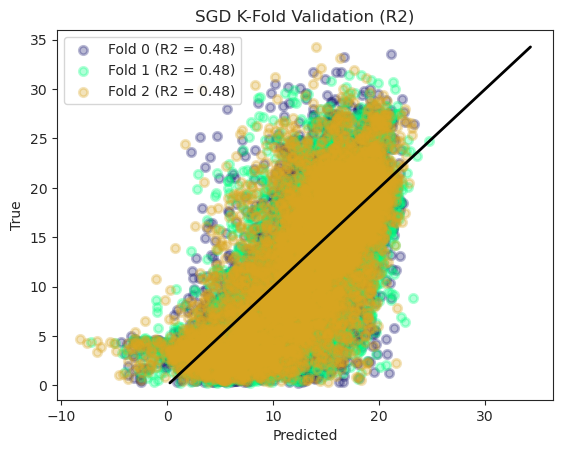

In [211]:
# Import the necessary libraries
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Create example data
X, y = make_regression(n_features=10, n_samples=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 3
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Instantiate the SGDRegressor with loss set to 'squared_epsilon_insensitive'
sgd = SGDRegressor(loss='squared_epsilon_insensitive', random_state=42)

# Create the pipeline
pipe_sgd = Pipeline([('scaler', StandardScaler()), ('sgd', sgd)])

# Initialize an empty list to store the R2 scores
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0

for train, test in cv.split(X_train_sel, y_train):
    model = pipe_sgd  # Use pipe_sgd instead of pipes['best_sgd']
    prediction = model.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i, score))
    i = i + 1

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD K-Fold Validation (R2)')
plt.legend()
plt.show()


### Test: SGD ###


#### Initiate Model ####

In [212]:
test_sgd = pipes['best_sgd']

#### Fit ####

In [213]:
test_sgd.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(eta0=1, learning_rate='adaptive',
                              loss='squared_epsilon_insensitive', max_iter=4500,
                              penalty='elasticnet'))])

##### Predict #####

In [214]:
pred_sgd = test_sgd.predict(X_test_sel)

##### Scores

> Store Scores

In [215]:
sgd_mae = mean_absolute_error(y_test, pred_sgd)
sgd_rmse = mean_squared_error(y_test, pred_sgd, squared=False)
sgd_r2 = r2_score(y_test, pred_sgd)
sgd_ev = explained_variance_score(y_test, pred_sgd)

sgd_scores = {"MAE":sgd_mae,
             "RMSE":sgd_rmse,
             "R2":sgd_r2,
             "Expl_Var":sgd_ev}

> Display Scores

In [216]:
sgd_scores

{'MAE': 3.9999481053511126,
 'RMSE': 5.095069352773126,
 'R2': 0.48846075378530496,
 'Expl_Var': 0.4884662107794211}

> Add to 'scores'

In [217]:
add_scores(sgd_scores, 'SGD')

'SGD' added to 'scores'


##### Display Results #####

In [218]:
print("Scores for SGD Model:")
print()
for k,v in sgd_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")


Scores for SGD Model:

MAE      :   4.0
RMSE     : 5.095
R2       : 0.488
Expl_Var : 0.488


##### Plot Predictions vs. True

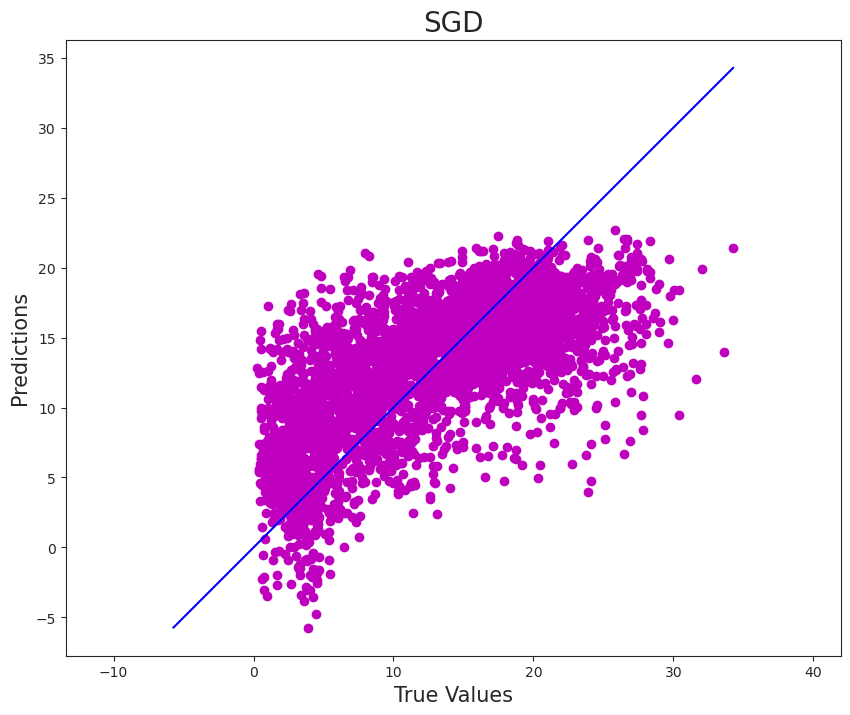

In [219]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_sgd, c='m')
plt.title("SGD", fontsize=20)
p1 = max(max(pred_sgd), max(y_test))
p2 = min(min(pred_sgd), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### Plot Residuals

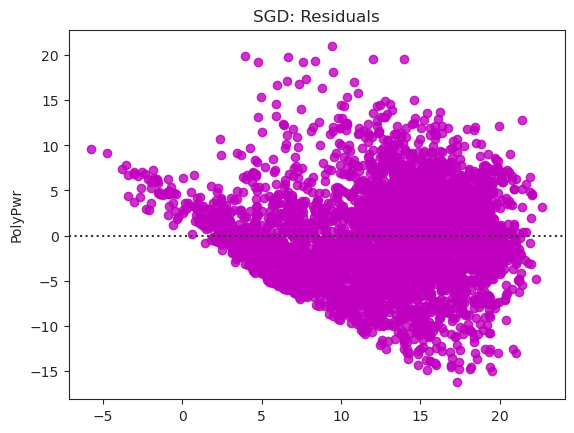

In [220]:
sns.residplot(x=pred_sgd, y=y_test,data=X_test_sel,color='m')
plt.title("SGD: Residuals");

##### JointPlot

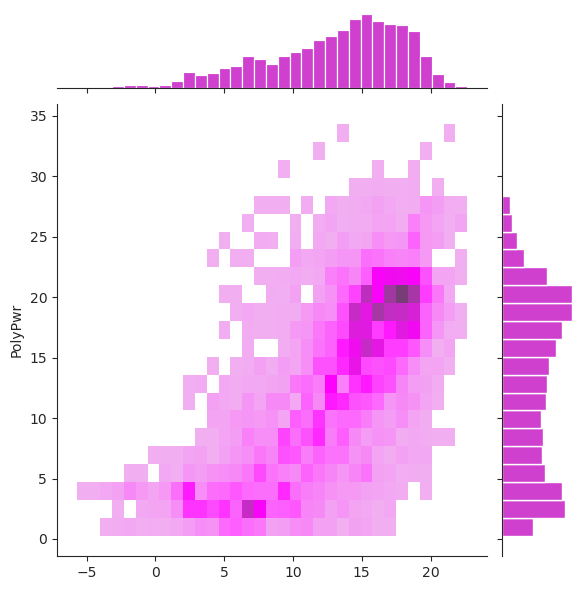

In [221]:
sns.jointplot(x=pred_sgd, y=y_test, data=X_test_sel, kind="hist", color='m');

>### MLP ###  
>#### ( Neural Network ) ####

#### Model ####

In [222]:
mlp = MLPRegressor()

#### Pipeline ####



In [223]:
pipe_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', mlp)])
add_pipe(pipe_mlp, 'mlp')

'mlp' added to 'pipes'


 #### Learning Curve  ####

In [225]:
#plot_lc('mlp')

## Fit Random Search Model #####

The next few cells take time to run.

To conitune with the saved results,

skip down to the cell that reads: "SKIP-TO-POINT"

### Hyper-parameters to Tune ###

In [226]:
hidden_layer_sizes = [(50,50,50), (50,100,50)]
activation = ['identity', 'logistic', 'tanh', 'relu'],
solver = ['lbfgs', 'sgd', 'adam']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant','adaptive']

#### Dictionary of Parameters ####


In [227]:
grid_mlp = {'mlp__hidden_layer_sizes': hidden_layer_sizes,
            'mlp__solver': solver,
            'mlp__alpha': alpha,
            'mlp__learning_rate': learning_rate}

#             'mlp__activation': activation,

#### Create Random Search ####


In [228]:
rcv_mlp = RandomizedSearchCV(estimator=pipe_mlp, param_distributions=grid_mlp,
                                 n_iter=1500, cv=cv, verbose=2, n_jobs=-1)

#### Fit the random search model ####

    ( Note: The RCV fitting takes a long time.
      Below following cell is an estimator saved from a previous fit. )

In [229]:
%%time

rcv_mlp.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 96 is smaller than n_iter=1500. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mo

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_pe

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib

CPU times: user 1min 48s, sys: 12.3 s, total: 2min 1s
Wall time: 23min 50s


/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('mlp', MLPRegressor())]),
                   n_iter=1500, n_jobs=-1,
                   param_distributions={'mlp__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                       1, 10, 100, 1000],
                                        'mlp__hidden_layer_sizes': [(50, 50,
                                                                     50),
                                                                    (50, 100,
                                                                     50)],
                                        'mlp__learning_rate': ['constant',
                                                               'adaptive'],
                                        'mlp__solver': ['lbfgs', 'sgd',
                                                        'adam']},
                   verbose=2)

##### Best Estimator #####
This estimator has been saved from a previous run.

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
                              learning_rate='adaptive', solver='sgd'))])

##### Best Estimator

In [230]:
best_mlp = rcv_mlp.best_estimator_


##### CV Scores

In [231]:
mean_score_mlp = rcv_mlp.cv_results_['mean_test_score']
std_score_mlp = rcv_mlp.cv_results_['std_test_score']
params_mlp = rcv_mlp.cv_results_['params']

In [232]:
cv_score_df = pd.DataFrame(params_mlp)
cv_score_df['mean_score_mlp'] = mean_score_mlp
cv_score_df['std_score_mlp'] = std_score_mlp

In [233]:
breakdown_mlp = {"Index": rcv_mlp.best_index_,
"Params" : rcv_mlp.best_params_,
"Estimator" : rcv_mlp.best_estimator_,
"Score" : rcv_mlp.best_score_}

##### Run Cell to use saved Hyper-Parameters

> SKIP-TO-POINT

In [234]:
best_mlp = MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
            learning_rate='adaptive', solver='sgd')

In [235]:
add_pipe(Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',best_mlp)]),'best_mlp')


'best_mlp' added to 'pipes'


In [236]:
print("    Before:")
print(pipes['mlp'])
print()
print("    After:")
print(pipes['best_mlp'])

    Before:
Pipeline(steps=[('scaler', StandardScaler()), ('mlp', MLPRegressor())])

    After:
Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
                              learning_rate='adaptive', solver='sgd'))])


#### K-Fold Scores ####

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


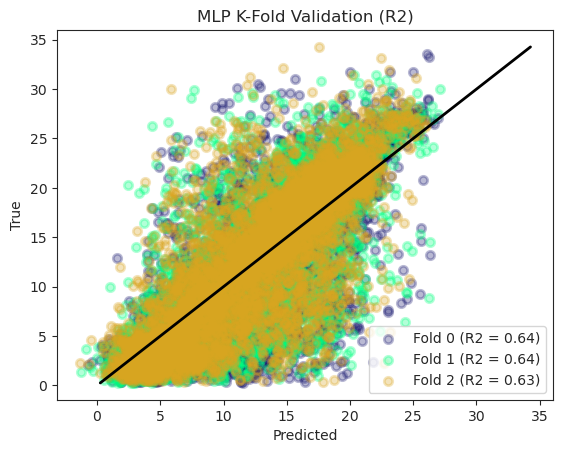

In [238]:
scores_ = []
colors = ['midnightblue', 'springgreen', 'goldenrod']
fig = plt.figure()
i = 0
for train, test in cv.split(X_train_sel, y_train):
    model = pipes['best_mlp']
    prediction = pipe_mlp.fit(X_train_sel.iloc[train], y_train.iloc[train]).predict(X_train_sel.iloc[test])
    true = y_train.iloc[test]
    score = r2_score(true, prediction)
    scores_.append(score)
    plt.scatter(prediction, true, c=colors[i],lw=2, alpha=0.3,
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP K-Fold Validation (R2)')
plt.legend()
plt.show()

### Test: MLP ###


#### Initiate Model ####

In [239]:
test_mlp = pipes['best_mlp']

#### Fit ####

In [240]:
test_mlp.fit(X_train_sel, y_train)

/Users/asadbek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(alpha=10, hidden_layer_sizes=(50, 100, 50),
                              learning_rate='adaptive', solver='sgd'))])

##### Predict #####

In [241]:
pred_mlp = test_mlp.predict(X_test_sel)


##### Scores

> Store Scores

In [242]:
mlp_mae = mean_absolute_error(y_test, pred_mlp)
mlp_rmse = mean_squared_error(y_test, pred_mlp, squared=False)
mlp_r2 = r2_score(y_test, pred_mlp)
mlp_ev = explained_variance_score(y_test, pred_mlp)

mlp_scores = {"MAE":mlp_mae,
             "RMSE":mlp_rmse,
             "R2":mlp_r2,
             "Expl_Var":mlp_ev}

> Display Scores

In [243]:
print("Scores for MLP Model:")
print()
for k,v in mlp_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")


Scores for MLP Model:

MAE      : 2.842
RMSE     : 4.145
R2       : 0.661
Expl_Var : 0.661


> Add to 'scores'

In [244]:
add_scores(mlp_scores, 'MLP')

'MLP' added to 'scores'


##### Display Results #####

In [245]:
print("Scores for MLP Model:")
print()
for k,v in mlp_scores.items():
    print(f"{k:<9}:{(str(round(v, 3))):>6}")


Scores for MLP Model:

MAE      : 2.842
RMSE     : 4.145
R2       : 0.661
Expl_Var : 0.661


##### Plot Predictions vs True

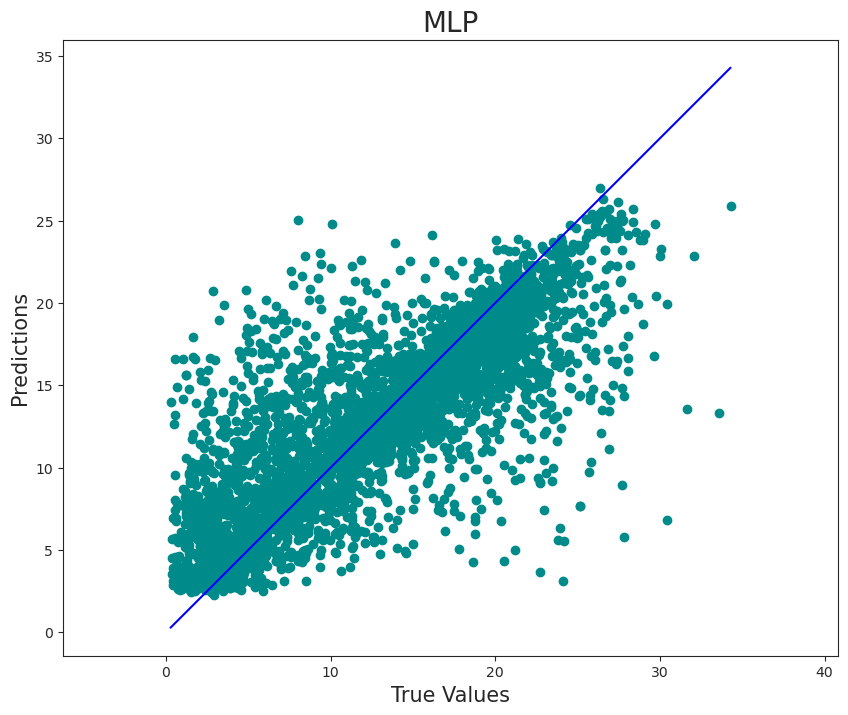

In [246]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, pred_mlp, c='darkcyan')
plt.title("MLP", fontsize=20)
p1 = max(max(pred_mlp), max(y_test))
p2 = min(min(pred_mlp), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### JointPlot

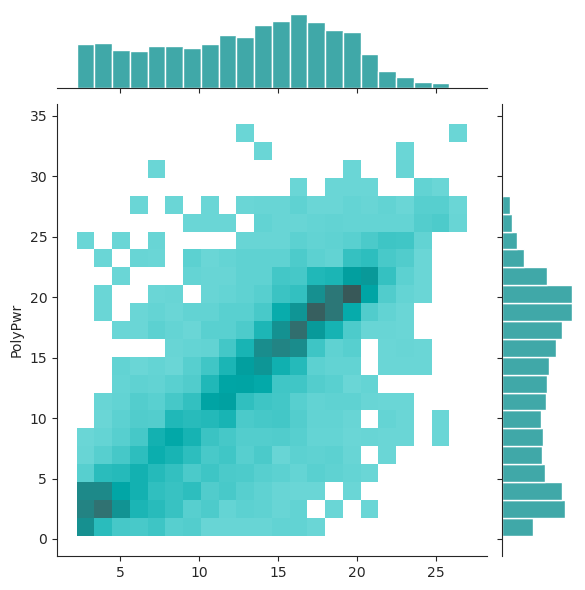

In [247]:
sns.jointplot(x=pred_mlp, y=y_test, data=X_test_sel, kind="hist", color='darkcyan');

##### Plot Residuals

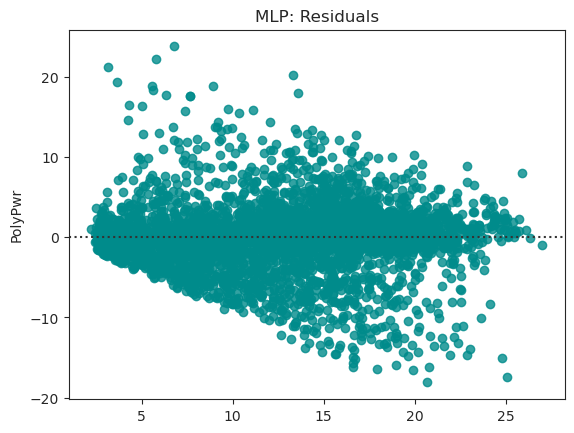

In [248]:
sns.residplot(x=pred_mlp, y=y_test,data=X_test_sel,color='darkcyan')
plt.title("MLP: Residuals");

>>## Scores ##

In [249]:
for k,v in scores.items():
#     mlp_scores
#     print(k)
    n_score = f"{k}_scores"
scores
#     print(type(n_score))
#     n_score.items():

{'Dummy': {...}, 'RFR': {...}, 'SGD': {...}, 'MLP': {...}}

In [250]:
print("Mean Scores")
print()
print(f"True:  {str(round(y_test.mean(),2))}")
print()
print(f"RFR:  {str(round(pred_rfr.mean(),2))}")
print(f"SGD:  {str(round(pred_sgd.mean(),2))}")
print(f"MLP:  {str(round(pred_mlp.mean(),2))}")

Mean Scores

True:  12.96

RFR:  12.91
SGD:  12.94
MLP:  12.95


#### Display Scores ####
This is currently filtering out the Explained Variance Score.

To turn filter off:
1. Comment out the if/else statement.
2. Comment in the print statement: "filter switch".

In [251]:
scores = {"Dummy":dummy_scores, "RFR":rfr_scores, "SGD":sgd_scores, "MLP":mlp_scores}

for model, score_set in scores.items():
    print(model)
    for metric, score in score_set.items():

        round_score = str(round(score))
        print(f"{metric:<9}:{str(round(score,3)):>6}")


Dummy
MAE      :  6.17
RMSE     : 7.124
R2       :  -0.0
Expl_Var :   0.0
RFR
MAE      : 2.592
RMSE     :  3.97
R2       : 0.689
Expl_Var :  0.69
SGD
MAE      :   4.0
RMSE     : 5.095
R2       : 0.488
Expl_Var : 0.488
MLP
MAE      : 2.842
RMSE     : 4.145
R2       : 0.661
Expl_Var : 0.661


#### Scores Dataframe

In [252]:
# create_df
scores_df = pd.DataFrame.from_dict(scores)



#### Optional: Drop Explained Variance metrric?

In [253]:
ev_row = scores_df.loc['Expl_Var']
scores_df.drop(labels = 'Expl_Var', inplace=True)

##### Display Scores

In [254]:
scores_df

Dummy       RFR       SGD       MLP
MAE   6.170176  2.592176  3.999948  2.841800
RMSE  7.123831  3.969632  5.095069  4.144705
R2   -0.000014  0.689487  0.488461  0.661494


#### Create Series per Row

In [255]:
mae = scores_df.loc["MAE"]
rmse = scores_df.loc["RMSE"]
r2 = scores_df.loc["R2"]
# ev = scores_df.loc["Expl_Var"]

dummy = scores_df.loc[:,"Dummy"]
rfr = scores_df.loc[:,"RFR"]
sgd = scores_df.loc[:,"SGD"]
mlp = scores_df.loc[:,"MLP"]

#### Plot Scores

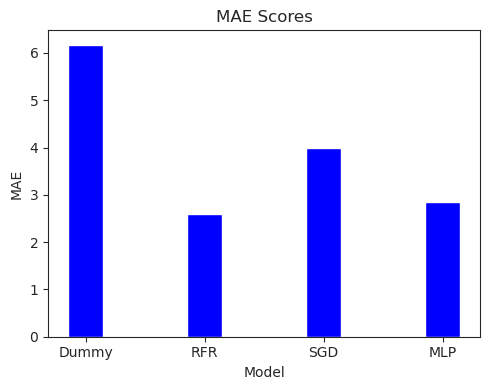

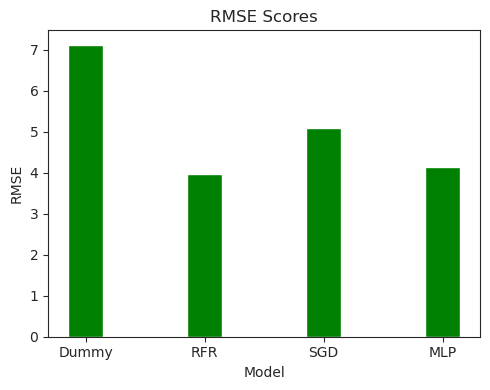

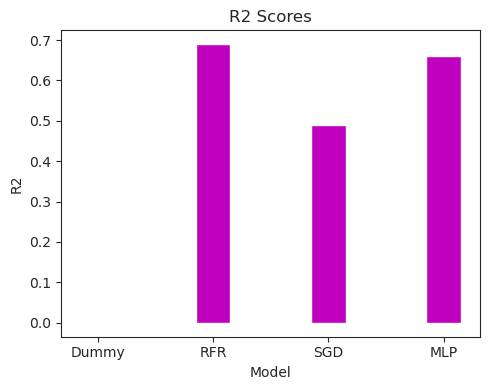

In [256]:
colors = ['b','g','m','y']
for i in range(len(scores_df.index)):
    print()
    fig =  plt.figure(figsize=(5,4))
    plt.bar(scores_df.columns, scores_df.iloc[i], color = colors[i], width = 0.3)
    plt.xlabel("Model")
    plt.ylabel(f"{scores_df.index[i]}")
    plt.title(f"{scores_df.index[i]} Scores")
    fig.tight_layout()
    plt.show();

##### KDE Plot

/var/folders/g1/4mss6fjs2klg0xx3r98rcdr80000gn/T/ipykernel_17412/3799905282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1 = sns.kdeplot(y_test, color="m", shade=True, label="Actual Value")


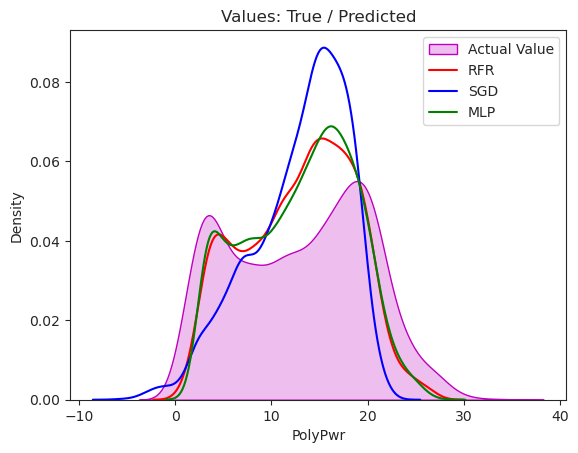

[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=lbfgs; total time=  24.1s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=  44.7s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=lbfgs; total time=  35.6s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=lbfgs; total time=  34.1s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=lbfgs; total time=  33.9s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=lbfgs; total time=  22.5s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  40.0s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__l

[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=lbfgs; total time=  24.6s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=lbfgs; total time=  21.8s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  40.4s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  56.4s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  56.3s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  40.2s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=  44.5s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learnin

[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  44.0s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  40.5s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=lbfgs; total time=  34.2s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=lbfgs; total time=  35.4s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time= 1.0min
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=lbfgs; total time=  22.5s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  40.7s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__lear

[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  44.2s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  40.9s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  56.0s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  57.2s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  40.2s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  40.4s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=  57.1s
[CV] END mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rat

In [257]:
ax1 = sns.kdeplot(y_test, color="m", shade=True, label="Actual Value")
ax2 = sns.kdeplot(pred_rfr, color="r", label="RFR")
ax3 = sns.kdeplot(pred_sgd, color="b", label="SGD")
ax4 = sns.kdeplot(pred_mlp, color="g", label="MLP")
plt.title("Values: True / Predicted")
plt.legend();
